In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Function to generate real data (noisy polynomial)
def real_function(x):
  return 2 * x**2 + 3 * x + 1 + np.random.normal(0, 5, x.shape)

In [20]:
# Generate fake data from the model (true polynomial without noise)
def fake_function(x):
  return 2 * x**2 + 3 * x + 1

In [21]:
# Generate real and fake datasets
x = np.linspace(-10, 10, 100).reshape(-1, 1)
y_real = real_function(x)
y_fake = fake_function(x)

In [22]:
# Prepare PyTorch datasets
real_data = torch.tensor(np.hstack((x, y_real)), dtype=torch.float32)
fake_data = torch.tensor(np.hstack((x, y_fake)), dtype=torch.float32)

In [23]:
# Discriminator Model
class DiscriminatorFunction(nn.Module):
  def __init__(self):
    super(DiscriminatorFunction, self).__init__()
    self.model = nn.Sequential(
    nn.Linear(2, 128), # Input x, y
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 1),
    nn.Sigmoid() # Output probability real or fake
    )
  def forward(self, x):
    return self.model(x)

In [24]:
# Initialize the model, loss function, and optimizer
discriminator = DiscriminatorFunction()
criterion = nn.BCELoss()
optimizer = optim.Adam(discriminator.parameters(), lr=0.001)

In [25]:
# Training loop
n_epochs = 1000
for epoch in range(n_epochs):
  # Train on real data
  optimizer.zero_grad()
  real_labels = torch.ones(real_data.size(0), 1)
  real_output = discriminator(real_data)
  real_loss = criterion(real_output, real_labels)
  # Train on fake data
  fake_labels = torch.zeros(fake_data.size(0), 1)
  fake_output = discriminator(fake_data)
  fake_loss = criterion(fake_output, fake_labels)
  # Combine losses and backpropagate
  loss = real_loss + fake_loss
  loss.backward()
  optimizer.step()
  if epoch % 100 == 0:
    print(f'Epoch {epoch}/{n_epochs}, Loss: {loss.item()}')

Epoch 0/1000, Loss: 4.620163440704346
Epoch 100/1000, Loss: 1.3073935508728027
Epoch 200/1000, Loss: 1.256849765777588
Epoch 300/1000, Loss: 1.232413411140442
Epoch 400/1000, Loss: 1.2164956331253052
Epoch 500/1000, Loss: 1.2020933628082275
Epoch 600/1000, Loss: 1.1854170560836792
Epoch 700/1000, Loss: 1.168612003326416
Epoch 800/1000, Loss: 1.1574373245239258
Epoch 900/1000, Loss: 1.139295220375061


In [26]:
# Test the discriminator on some data points
test_x = np.linspace(-10, 10, 20).reshape(-1, 1)

test_y_real = real_function(test_x)
test_y_fake = fake_function(test_x)

test_real_data = torch.tensor(np.hstack((test_x, test_y_real)), dtype=torch.float32)
test_fake_data = torch.tensor(np.hstack((test_x, test_y_fake)), dtype=torch.float32)

real_prob = discriminator(test_real_data).detach().numpy()
fake_prob = discriminator(test_fake_data).detach().numpy()

Text(0.5, 1.0, 'Real vs Fake Data')

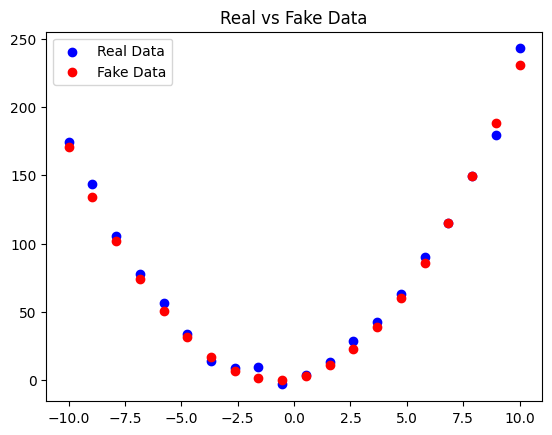

In [27]:
# Plot the results
plt.scatter(test_x, test_y_real, c='blue', label='Real Data')
plt.scatter(test_x, test_y_fake, c='red', label='Fake Data')
plt.legend()
plt.title('Real vs Fake Data')

In [28]:
# Show discriminator confidence on data
for i, (x_val, real_p, fake_p) in enumerate(zip(test_x, real_prob, fake_prob)):
  print(f'x={x_val[0]:.2f}, Discriminator Real Prob={real_p[0]:.4f}, Fake Prob={fake_p[0]:.4f}')
plt.show()


x=-10.00, Discriminator Real Prob=0.5290, Fake Prob=0.5273
x=-8.95, Discriminator Real Prob=0.5632, Fake Prob=0.5428
x=-7.89, Discriminator Real Prob=0.5420, Fake Prob=0.5318
x=-6.84, Discriminator Real Prob=0.5461, Fake Prob=0.5344
x=-5.79, Discriminator Real Prob=0.5681, Fake Prob=0.5504
x=-4.74, Discriminator Real Prob=0.5623, Fake Prob=0.5263
x=-3.68, Discriminator Real Prob=0.3921, Fake Prob=0.4686
x=-2.63, Discriminator Real Prob=0.5291, Fake Prob=0.4828
x=-1.58, Discriminator Real Prob=0.7611, Fake Prob=0.0000
x=-0.53, Discriminator Real Prob=1.0000, Fake Prob=0.0000
x=0.53, Discriminator Real Prob=0.0691, Fake Prob=0.0087
x=1.58, Discriminator Real Prob=0.4813, Fake Prob=0.2609
x=2.63, Discriminator Real Prob=0.6088, Fake Prob=0.4686
x=3.68, Discriminator Real Prob=0.5315, Fake Prob=0.5161
x=4.74, Discriminator Real Prob=0.5059, Fake Prob=0.4956
x=5.79, Discriminator Real Prob=0.5112, Fake Prob=0.4969
x=6.84, Discriminator Real Prob=0.5118, Fake Prob=0.5123
x=7.89, Discriminato